# TFDS Hello World

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%203%20-%20TensorFlow%20Datasets/Week%201/Examples/tfds_hello_world.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%203%20-%20TensorFlow%20Datasets/Week%201/Examples/tfds_hello_world.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

In this notebook we will take a look at the simple Hello World scenario of TensorFlow Datasets (TFDS). We'll use TFDS to perform the extract, transform, and load processes for the MNIST dataset.

## Setup

We'll start by importing TensorFlow, TensorFlow Datasets, and Matplotlib.

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

print("\u2022 Using TensorFlow Version:", tf.__version__)

• Using TensorFlow Version: 2.0.0


## Extract - Transform - Load (ETL)

Now we'll run the **ETL** code. First, to perform the **Extract** process we use `tfts.load`. This handles everything from downloading the raw data to parsing and splitting it, giving us a dataset. Next, we perform the **Transform** process. In this simple example, our transform process will just consist of shuffling the dataset. Finally, we **Load** one record by using the `take(1)` method. In this case, each record consists of an image and its corresponding label. After loading the record we proceed to plot the image and print its corresponding label. 

Label: 0


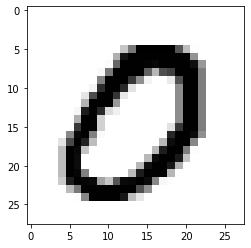

In [8]:
# EXTRACT
dataset = tfds.load(name="mnist", split="train")

# TRANSFORM
dataset = dataset.shuffle(100)

# LOAD
for data in dataset.take(1):
    image = data["image"].numpy().squeeze()
    label = data["label"].numpy()
    
    print("Label: {}".format(label))
    plt.imshow(image, cmap=plt.cm.binary)
    plt.show()

In [4]:
dataset

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

## view available dataset

In [5]:
# list all publicly available dataset
print(tfds.list_builders())

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'arc', 'bair_robot_pushing_small', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'cos_e', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'esnli', 'eurosat', 'fashion_mnist', 'flic', 'flores', 'food101', 'gap', 'gigaword', 'glue', 'groove', 'higgs', 'horses_or_humans', 'i_naturalist2017', 'image_label_folder', 'imagenet2012', 'imagenet201

## view dataset metadata

In [6]:
dataset, info = tfds.load(name="mnist", with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



# Versioning of dataset
major_version.minor_version.patch_version

- major_version: existing data has changed, or slicing is different
- minor_version: additional features has ben added
- patch_version: serialization on disk may have changed

In [ ]:
# return the last version of major_version 1
dataset = tfds.load(name="mnist:1.*.*")

# Return ready for superviser learning

In [18]:
dataset = tfds.load(name="mnist", as_supervised=True)
for image, label in dataset['train'].take(2):
    print(image.shape, label.shape)

(28, 28, 1) ()
(28, 28, 1) ()


# Split
standardize naming:
- TRAIN
- VALIDATION
- TEST
- ALL

## custom test split

In [ ]:
split = tfds.Split('test2015')
ds = tfds.load('coco2014', split=split)

# DatasetBuilder
The Exctract of ETL is achieve under the hood by a DatasetBuilder

In [ ]:
dataset = tfds.load(name="mnist", split="train")

# EQUIVALENT

mnist_builder = tfds.builder('mnist')
mnist_builder.download_and_prepare()
mnist_builder.as_dataset(split=tfds.Split.TRAIN)